In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math


2023-04-27 12:51:58.850185: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 12:51:59.030565: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 12:51:59.031886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 12:52:00.378605: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


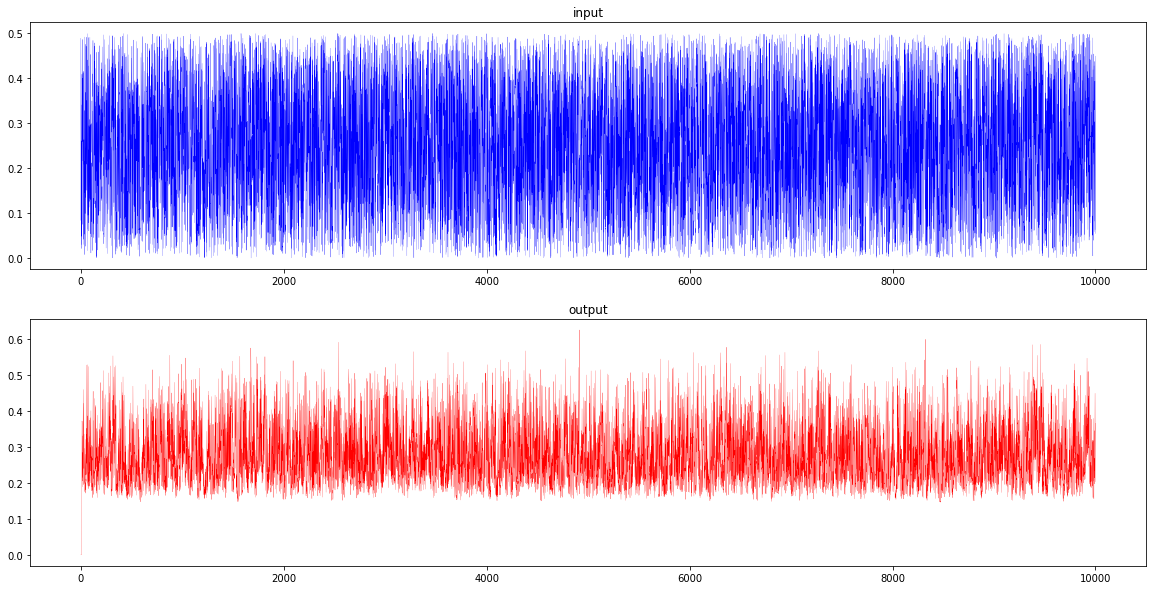

In [ ]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000]
x_test = x[5000:]

y_train = x[:4000]
y_valid = x[4000:5000]
y_test = x[5000:]

## RNN

In [ ]:
def create_RNN(hidden_units,dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0], return_sequences=True)) #stateful = True
    model.add(Dense(units=dense_units, activation=activation[1]))
    learning_rate = 0.03
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
model = create_RNN(1, 1 , (len(x_train),1), activation=['tanh', 'tanh'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_26 (SimpleRNN)   (None, 4000, 1)           3         
                                                                 
 dense_22 (Dense)            (None, 4000, 1)           2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]
wy = model.get_weights()[3]
by = model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)




wx =  [[-0.65938413]]  wh =  [[-1.]]  bh =  [0.]  wy = [[0.7420713]] by =  [0.]


In [ ]:
print(x_train.shape)

(4000,)


In [ ]:

X_train = np.reshape(x_train, (1,len(x_train),1))
Y_train = np.reshape(y_train, (1,len(y_train),1))

X_valid = np.reshape(x_valid, (1,len(x_valid),1))
Y_valid = np.reshape(y_valid, (1,len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)


model.evaluate(X_train, Y_train)
#history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_valid, Y_valid))
history = model.fit(X_train, Y_train, epochs = 1000)




(1, 4000, 1)
(1, 4000, 1)
(1, 1000, 1)
(1, 1000, 1)
1/1 [==============================] - 0s 305ms/step - loss: 0.1700
Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.1700
Epoch 2/1000
1/1 [==============================] - 0s 391ms/step - loss: 0.1687
Epoch 3/1000
1/1 [==============================] - 0s 393ms/step - loss: 0.1674
Epoch 4/1000
1/1 [==============================] - 0s 387ms/step - loss: 0.1661
Epoch 5/1000
1/1 [==============================] - 0s 495ms/step - loss: 0.1648
Epoch 6/1000
1/1 [==============================] - 0s 442ms/step - loss: 0.1636
Epoch 7/1000
1/1 [==============================] - 1s 519ms/step - loss: 0.1623
Epoch 8/1000
1/1 [==============================] - 0s 402ms/step - loss: 0.1610
Epoch 9/1000
1/1 [==============================] - 0s 421ms/step - loss: 0.1598
Epoch 10/1000
1/1 [==============================] - 0s 430ms/step - loss: 0.1585
Epoch 11/1000
1/1 [==============================] - 0s 417ms/step - los

1/1 [==============================] - 0s 139ms/step


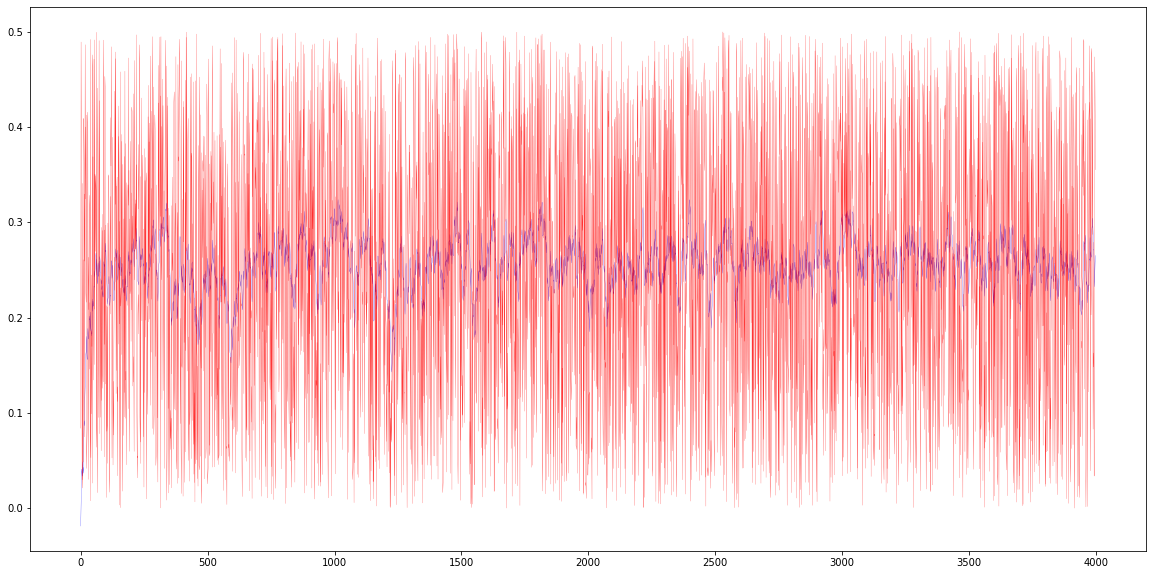

In [ ]:
y = model.predict(X_train)
t=np.arange(start=0,stop=len(X_train[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,Y_train.ravel(), color = 'r', linewidth= 0.2)

y = model.predict(X_valid)
t=np.arange(start=0,stop=len(X_valid[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.2)